### Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

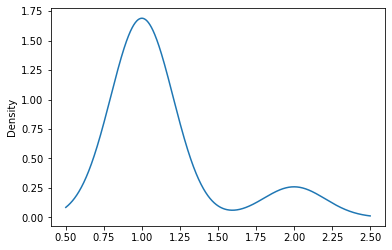

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.value_counts().plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

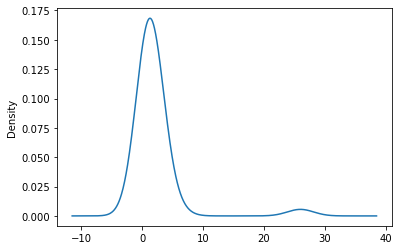

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.value_counts().plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Lacys\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\Lacys\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3 - Optimize Attempt 1:  Add a third hidden layer

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_a1/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_a1/weights.{epoch:02d}hdf5"

In [19]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 678us/step - loss: 0.5733 - accuracy: 0.7201
Epoch 2/100
804/804 [==============================] - 1s 653us/step - loss: 0.5548 - accuracy: 0.7311
Epoch 3/100
804/804 [==============================] - 1s 674us/step - loss: 0.5520 - accuracy: 0.7311
Epoch 4/100
804/804 [==============================] - 1s 697us/step - loss: 0.5500 - accuracy: 0.7333
Epoch 5/100
804/804 [==============================] - 1s 698us/step - loss: 0.5487 - accuracy: 0.7333
Epoch 6/100
804/804 [==============================] - 1s 689us/step - loss: 0.5478 - accuracy: 0.7322
Epoch 7/100
804/804 [==============================] - 1s 700us/step - loss: 0.5468 - accuracy: 0.7335
Epoch 8/100
804/804 [==============================] - 1s 807us/step - loss: 0.5467 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 1s 719us/step - loss: 0.5463 - accuracy: 0.7364
Epoch 10/100
804/804 [==============================] - 1s 783us/step - l

804/804 [==============================] - 1s 739us/step - loss: 0.5361 - accuracy: 0.7404
Epoch 79/100
804/804 [==============================] - 1s 740us/step - loss: 0.5358 - accuracy: 0.7401
Epoch 80/100
804/804 [==============================] - 1s 738us/step - loss: 0.5363 - accuracy: 0.7400
Epoch 81/100
804/804 [==============================] - 1s 827us/step - loss: 0.5360 - accuracy: 0.7404
Epoch 82/100
804/804 [==============================] - 1s 733us/step - loss: 0.5363 - accuracy: 0.7404
Epoch 83/100
804/804 [==============================] - 1s 706us/step - loss: 0.5361 - accuracy: 0.7409
Epoch 84/100
804/804 [==============================] - 1s 728us/step - loss: 0.5361 - accuracy: 0.7403
Epoch 85/100
804/804 [==============================] - 1s 781us/step - loss: 0.5361 - accuracy: 0.7404
Epoch 86/100
804/804 [==============================] - 1s 840us/step - loss: 0.5355 - accuracy: 0.7409
Epoch 87/100
804/804 [==============================] - 1s 761us/step - loss:

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5558 - accuracy: 0.7277 - 255ms/epoch - 953us/step
Loss: 0.5557719469070435, Accuracy: 0.7276967763900757


### Deliverable 3 - Optimize Attempt 2:  Use Leaky Relu instead of ReLu & Sigmoid

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="leaky_relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="leaky_relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="leaky_relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="leaky_relu"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                3520      
                                                                 
 dense_5 (Dense)             (None, 30)                2430      
                                                                 
 dense_6 (Dense)             (None, 15)                465       
                                                                 
 dense_7 (Dense)             (None, 1)                 16        
                                                                 
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_a2/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_a2/weights.{epoch:02d}hdf5"

In [24]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 886us/step - loss: 1.1055 - accuracy: 0.6907
Epoch 2/100
804/804 [==============================] - 1s 845us/step - loss: 0.8782 - accuracy: 0.7167
Epoch 3/100
804/804 [==============================] - 1s 783us/step - loss: 0.8248 - accuracy: 0.7181
Epoch 4/100
804/804 [==============================] - 1s 810us/step - loss: 0.8505 - accuracy: 0.7135
Epoch 5/100
804/804 [==============================] - 1s 895us/step - loss: 0.8259 - accuracy: 0.7074
Epoch 6/100
804/804 [==============================] - 1s 896us/step - loss: 0.8049 - accuracy: 0.7181
Epoch 7/100
804/804 [==============================] - 1s 937us/step - loss: 0.8201 - accuracy: 0.7204
Epoch 8/100
804/804 [==============================] - 1s 810us/step - loss: 0.6657 - accuracy: 0.7217
Epoch 9/100
804/804 [==============================] - 1s 814us/step - loss: 0.6742 - accuracy: 0.7165
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - los

Epoch 79/100
804/804 [==============================] - 1s 801us/step - loss: 0.5608 - accuracy: 0.7341
Epoch 80/100
804/804 [==============================] - 1s 794us/step - loss: 0.5636 - accuracy: 0.7350
Epoch 81/100
804/804 [==============================] - 1s 781us/step - loss: 0.5652 - accuracy: 0.7344
Epoch 82/100
804/804 [==============================] - 1s 883us/step - loss: 0.5640 - accuracy: 0.7345
Epoch 83/100
804/804 [==============================] - 1s 794us/step - loss: 0.5616 - accuracy: 0.7364
Epoch 84/100
804/804 [==============================] - 1s 775us/step - loss: 0.5663 - accuracy: 0.7335
Epoch 85/100
804/804 [==============================] - 1s 795us/step - loss: 0.5731 - accuracy: 0.7296
Epoch 86/100
804/804 [==============================] - 1s 807us/step - loss: 0.5653 - accuracy: 0.7352
Epoch 87/100
804/804 [==============================] - 1s 905us/step - loss: 0.5683 - accuracy: 0.7340
Epoch 88/100
804/804 [==============================] - 1s 883us

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5801 - accuracy: 0.7231 - 230ms/epoch - 857us/step
Loss: 0.5801404118537903, Accuracy: 0.7231487035751343


### Deliverable 3 - Optimize Attempt 3: categorize ASK_AMT column, use 3 hiddle layers, and LeakyRelu

In [26]:
application_df.nunique()

STATUS                             2
ASK_AMT                         8747
IS_SUCCESSFUL                      2
APPLICATION_TYPE_Other             2
APPLICATION_TYPE_T10               2
APPLICATION_TYPE_T19               2
APPLICATION_TYPE_T3                2
APPLICATION_TYPE_T4                2
APPLICATION_TYPE_T5                2
APPLICATION_TYPE_T6                2
APPLICATION_TYPE_T7                2
APPLICATION_TYPE_T8                2
AFFILIATION_CompanySponsored       2
AFFILIATION_Family/Parent          2
AFFILIATION_Independent            2
AFFILIATION_National               2
AFFILIATION_Other                  2
AFFILIATION_Regional               2
CLASSIFICATION_C1000               2
CLASSIFICATION_C1200               2
CLASSIFICATION_C2000               2
CLASSIFICATION_C2100               2
CLASSIFICATION_C3000               2
CLASSIFICATION_Other               2
USE_CASE_CommunityServ             2
USE_CASE_Heathcare                 2
USE_CASE_Other                     2
U

In [27]:
ASK_AMT_counts = application_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [28]:
def ask_group(ASK_AMT):
    if ASK_AMT < 5000:
        return 0
    elif ASK_AMT < 50000:
        return 1
    elif ASK_AMT < 100000:
        return 2
    elif ASK_AMT < 250000:
        return 3
    elif ASK_AMT < 500000:
        return 4
    else:
        return 5


In [29]:
application_df["ASK_AMT"] = application_df.apply(lambda row: ask_group(row["ASK_AMT"]),axis=1)

In [30]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\Lacys\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="leaky_relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="leaky_relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="leaky_relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="leaky_relu"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                3520      
                                                                 
 dense_9 (Dense)             (None, 30)                2430      
                                                                 
 dense_10 (Dense)            (None, 15)                465       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________


In [34]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_a3/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_a3/weights.{epoch:02d}hdf5"

In [36]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 751us/step - loss: 0.8056 - accuracy: 0.6971
Epoch 2/100
804/804 [==============================] - 1s 802us/step - loss: 0.7238 - accuracy: 0.7139
Epoch 3/100
804/804 [==============================] - 1s 825us/step - loss: 0.7038 - accuracy: 0.7160
Epoch 4/100
804/804 [==============================] - 1s 861us/step - loss: 0.8158 - accuracy: 0.7177
Epoch 5/100
804/804 [==============================] - 1s 915us/step - loss: 0.7233 - accuracy: 0.7135
Epoch 6/100
804/804 [==============================] - 1s 929us/step - loss: 0.6514 - accuracy: 0.7153
Epoch 7/100
804/804 [==============================] - 1s 940us/step - loss: 0.6302 - accuracy: 0.7262
Epoch 8/100
804/804 [==============================] - 1s 792us/step - loss: 0.6142 - accuracy: 0.7174
Epoch 9/100
804/804 [==============================] - 1s 761us/step - loss: 0.6348 - accuracy: 0.6958
Epoch 10/100
804/804 [==============================] - 1s 813us/step - l

804/804 [==============================] - 1s 752us/step - loss: 0.5675 - accuracy: 0.7358
Epoch 79/100
804/804 [==============================] - 1s 788us/step - loss: 0.5642 - accuracy: 0.7355
Epoch 80/100
804/804 [==============================] - 1s 808us/step - loss: 0.5531 - accuracy: 0.7353
Epoch 81/100
804/804 [==============================] - 1s 768us/step - loss: 0.5575 - accuracy: 0.7346
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5618 - accuracy: 0.7355
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5717 - accuracy: 0.7285
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5852 - accuracy: 0.7198
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7271
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7322
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5492 - ac

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5756 - accuracy: 0.7238 - 263ms/epoch - 982us/step
Loss: 0.5756166577339172, Accuracy: 0.7238484025001526


In [40]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")